# LOGISTIC REGRESSION AMAZON ASSIGNMENT

OBJECTIVE:

*   TO FIND THE OPTIMAL VALUE OF ' lambda '( hyperparameter )
*   TO FIND THE ACCURACY SCORE OF OUR PREDICTION ON TEST DATASET.

NOTE:

*   Dataset is preprocessed and time-based splitted(Train , Test , Cross-Validate).
*  SAMPLE_SIZE: 100000 Reviews (70K-TRAIN , 15K-CROSS_VALIDATE , 15K-TEST).











IMPORTING LIBRARIES AND OUR DATASET

In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
from scipy.sparse import find
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from prettytable import PrettyTable

IMPORTING THE PREPROCESSED AND TIME_BASED SPLITTED DATASET

In [0]:
Train=joblib.load('TRAIN.joblib')
CrossVal=joblib.load('CROSS_VALIDATE.joblib')
Test=joblib.load('TEST.joblib')

In [0]:
Train_x=Train['Text'].values
CrossVal_x=CrossVal['Text'].values
Test_x=Test['Text'].values
Train_y=Train['Score'].values
CrossVal_y=CrossVal['Score'].values
Test_y=Test['Score'].values

**1. BAG OF WORDS**

In [0]:
count= CountVectorizer()

In [0]:
count.fit(Train_x)
Train_BOW = count.transform(Train_x)
CrossVal_BOW = count.transform(CrossVal_x)
Test_BOW= count.transform(Test_x) 

**1.1. L2 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  logreg = LogisticRegression(C=i)
  logreg.fit(Train_BOW, Train_y)
  Train_y_pred =  logreg.predict_proba(Train_BOW)[:,1]
  Train_AUC_BOW.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_BOW)[:,1]
  CrossVal_AUC_BOW.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

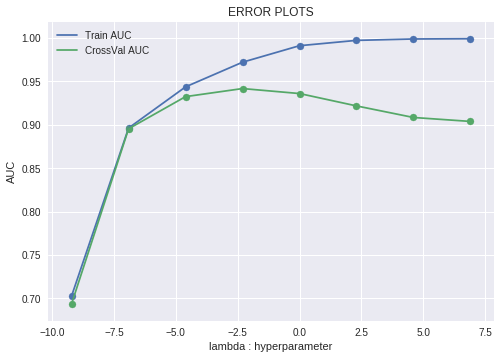

In [0]:
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
print(pow(optimal_inverse_lambda,-1))

10.0


The optimal value of ' lambda ' obtained is 10.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda)
Classifier.fit(Train_BOW, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW)[:,1])

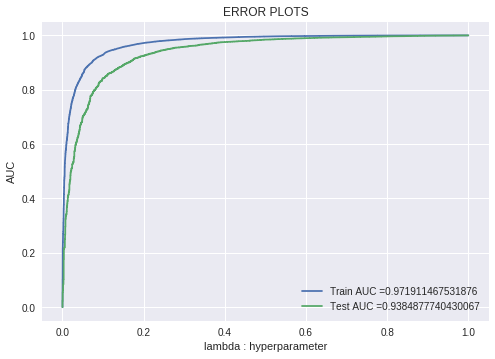

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


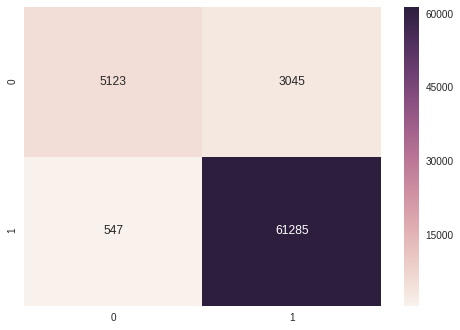

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(Train_BOW))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


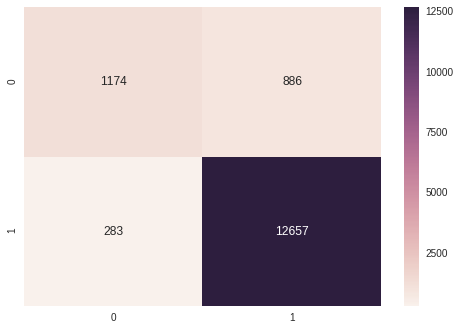

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(Test_BOW))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**Most Important Features**

In [0]:
feature_names = count.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 10 negative class words")
print(prob_sorted[:10])
print("Top 10 positive class words")
print(prob_sorted[:-(11):-1])

Top 10 negative class words
[(-2.157053060577407, 'worst'), (-1.6968685632706932, 'disappointing'), (-1.559899040253317, 'terrible'), (-1.5190378526299602, 'disappointment'), (-1.416760371849405, 'bland'), (-1.3813812516392583, 'awful'), (-1.3794461154093853, 'threw'), (-1.3279915016946462, 'horrible'), (-1.2416977464327381, 'disappointed'), (-1.237011308781475, 'unfortunately')]
Top 10 positive class words
[(1.4774320369535596, 'delicious'), (1.392326841081653, 'perfect'), (1.3227663787023058, 'loves'), (1.322325410897561, 'excellent'), (1.2144077311116384, 'best'), (1.203383700345146, 'great'), (1.1883230010926207, 'wonderful'), (1.1682506183170764, 'highly'), (1.1550389295871986, 'pleased'), (1.1543063826108413, 'amazing')]


**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=10 on Test Dataset is  13831(92.2%) .
2. The Area Under Curve value for Test Dataset is 0.93848(approx) which is quite high.
3. The L2 regularisation method takes little less time for computation.

**1.2. L1 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in c:
  print(i)
  logreg = LogisticRegression(C=i,penalty='l1')
  logreg.fit(Train_BOW, Train_y)
  Train_y_pred =  logreg.predict_proba(Train_BOW)[:,1]
  Train_AUC_BOW.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_BOW)[:,1]
  CrossVal_AUC_BOW.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

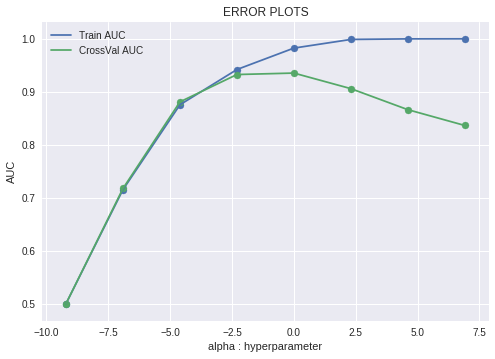

In [0]:
plt.plot(C, Train_AUC_BOW, label='Train AUC')
plt.scatter(C, Train_AUC_BOW)
plt.plot(C, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
print(pow(optimal_inverse_lambda,-1))

1.0


The optimal value of ' lambda ' obtained is 1.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1')
Classifier.fit(Train_BOW, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_BOW)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_BOW)[:,1])

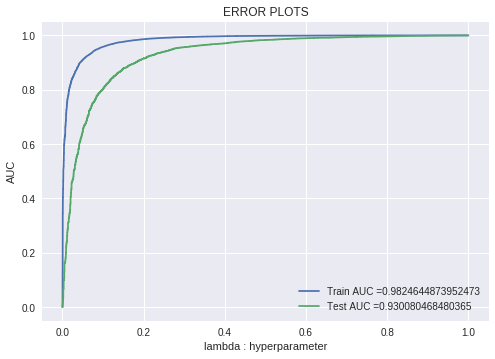

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

**Sparsity of Weight Vector .**

In [0]:
w = Classifier.coef_
print(len(w[0])-np.count_nonzero(w))

44995


Number of elements of W* being zero is 44995.

Confusion Matrix of Train Data


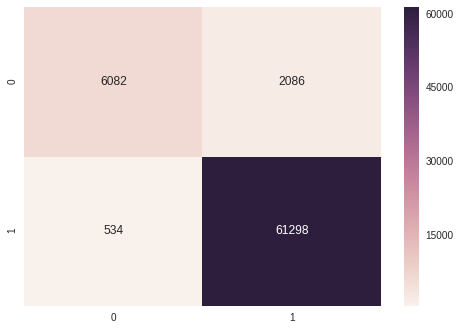

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(Train_BOW))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


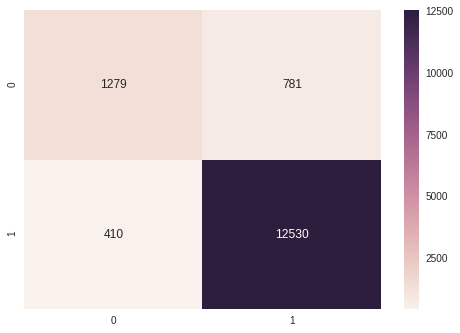

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(Test_BOW))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**Most Important Features**

In [0]:
feature_names = count.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 10 negative class words")
print(prob_sorted[:10])
print("Top 10 positive class words")
print(prob_sorted[:-(11):-1])

Top 10 negative class words
[(-3.9344705000455225, 'worst'), (-3.3723686411502944, 'maunfacturer'), (-3.339547727869548, 'canceled'), (-3.329438707133336, 'robitussin'), (-3.243833123209996, 'ly'), (-3.212612014094787, 'salvage'), (-3.115503926139446, 'nurture'), (-3.0987712623050716, 'diminishes'), (-3.0929365269345377, 'hopes'), (-3.000413924651355, 'fallen')]
Top 10 positive class words
[(3.34940308767179, 'spectacular'), (3.3259028084896274, 'scary'), (3.304226032357323, 'pleasantly'), (3.173110654461384, 'solved'), (3.122866465273725, 'addicting'), (3.045316003542149, 'pero'), (2.985106878483142, 'blessing'), (2.9496595451471483, 'quirk'), (2.9151086526598813, 'ramune'), (2.827731706286295, 'scrumptious')]


**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=1 on Test Dataset is  13809(92.06%) little less than L2 model.
2. The Area Under Curve value for Test Dataset is 0.93008(approx) which is quite high.
3. The L1 regularisation method takes little more time for computation.
4. Number of elements of W* being zero is 44995 .

**Perturbation Test**

In [0]:
weights1 = (Classifier.coef_[0])

Adding small error to the dataset.

In [0]:
X_train_t = Train_BOW
epsilon = np.random.normal(loc=0.0, scale=0.01)
X_train_t.data=X_train_t.data+epsilon  

In [0]:
classifier=LogisticRegression(C=0.1,penalty='l2')
classifier.fit(X_train_t, Train_y)

In [0]:
weights2=(classifier.coef_[0])

In [0]:
weights1=weights1+pow(10,-6)
weights2=weights2+pow(10,-6)

In [0]:
weights_diff = (abs(weights1 - weights2)/weights1) * 100

In [0]:
percentiles=(range(100,-1,-3))

In [0]:
P=(np.percentile(weights_diff,(percentiles)))

In [17]:
P

array([ 9.05277979e+04,  4.68463416e+00,  2.39170715e+00,  1.69754710e+00,
        1.35452643e+00,  1.14290257e+00,  1.00460266e+00,  8.89415899e-01,
        8.05247585e-01,  7.30704133e-01,  6.66308650e-01,  6.09900015e-01,
        5.55876118e-01,  5.05696826e-01,  4.58695025e-01,  4.15873568e-01,
        3.71203041e-01,  3.29650619e-01,  2.89361162e-01,  2.48755794e-01,
        2.06031254e-01,  1.67402545e-01,  1.27322911e-01,  8.54225855e-02,
        4.36140487e-02, -3.16458949e-04, -1.29106796e-01, -2.50590743e-01,
       -3.76670622e-01, -5.01515793e-01, -6.39419930e-01, -8.11475686e-01,
       -1.31608692e+00, -1.91583608e+02])

From the percentile values of weight difference , its is evedent that there is sudden change in weight difference values from 99 percentile to 100 percentile .

In [0]:
percentiles=[100,99.95,99.9,99.8,99.7,99.6,99.5,99.4,99.3,99.2,99.1,99]

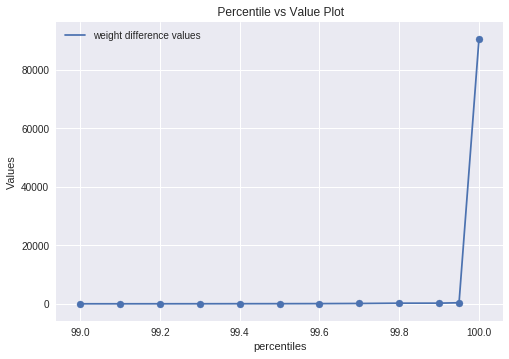

In [78]:
plt.plot(percentiles,P, label='weight difference values')
plt.scatter(percentiles,P)
plt.legend()
plt.xlabel("percentiles")
plt.ylabel("Values")
plt.title(" Percentile vs Value Plot")
plt.show()

In [79]:
np.percentile(weights_diff,percentiles)

array([9.05277979e+04, 3.71453774e+02, 2.41989220e+02, 2.31677131e+02,
       1.31236020e+02, 8.23868251e+01, 5.92939945e+01, 4.98181387e+01,
       3.47996647e+01, 2.81454651e+01, 2.34616112e+01, 2.15258860e+01])

So , there is sudden change in weight difference values from 99.95 percentile to 100 percentile .

In [0]:
Collinear=list(filter(lambda x: x > np.percentile(weights_diff,99.95),weights_diff ))

In [83]:
print("Number of features which are collinear")
len(Collinear)

Number of features which are collinear


23

**Collinear Features**

In [0]:
indexes=[]
for i in range(len(weights_diff)):
  if weights_diff[i] >  np.percentile(weights_diff,99.95):
    indexes.append(i)

In [0]:
coefs_with_fns =list(zip(Classifier.coef_[0],count.get_feature_names()))

In [0]:
names=[]
for i in indexes:
  names.append(coefs_with_fns[i])

In [87]:
names

[(8.820973836240561e-08, 'alcholic'),
 (1.0631793144331637e-09, 'antiqie'),
 (2.860728746938198e-09, 'blorph'),
 (8.42064905915388e-10, 'circumference'),
 (1.0073850398048655e-08, 'darjeelings'),
 (5.1007673215016985e-05, 'embracing'),
 (0.00021029508656920297, 'fats'),
 (1.1258386084183307e-06, 'foyer'),
 (3.985433917798793e-09, 'greenly'),
 (5.1007673215016985e-05, 'hunan'),
 (8.42064905915388e-10, 'idealized'),
 (2.860728746938198e-09, 'krack'),
 (5.1007673215016985e-05, 'mated'),
 (1.0073850398048655e-08, 'milikthong'),
 (3.528389534496214e-08, 'milliliters'),
 (1.896307810903919e-05, 'pectin'),
 (3.739490181484494e-11, 'sadler'),
 (3.528389534496214e-08, 'scrump'),
 (3.528389534496214e-08, 'scrumptuutious'),
 (3.985433917798793e-09, 'sloth'),
 (3.640993191818129e-08, 'sprinking'),
 (2.860728746938198e-09, 'unaffordable'),
 (1.860001744089259e-08, 'wort')]

**Most Important Features**

In [0]:
def show_most_informative_features(vectorizer,Classifier, n=10):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(Classifier.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\t\tMost important features of each class")
    print("\t\tNegative\t\t\t\t\tPositive")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(count,Classifier)
#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

			Most important features of each class
		Negative					Positive
________________________________________________________________________________________________
	-2.1571	worst          				1.4774	delicious      
	-1.6969	disappointing  				1.3923	perfect        
	-1.5599	terrible       				1.3228	loves          
	-1.5190	disappointment 				1.3223	excellent      
	-1.4168	bland          				1.2144	best           
	-1.3814	awful          				1.2034	great          
	-1.3794	threw          				1.1883	wonderful      
	-1.3280	horrible       				1.1683	highly         
	-1.2417	disappointed   				1.1550	pleased        
	-1.2370	unfortunately  				1.1543	amazing        


**2. TF-IDF**

In [0]:
tf_idf=TfidfVectorizer(ngram_range=(1,2))

In [0]:
tf_idf.fit(Train_x)
Train_TFIDF = tf_idf.transform(Train_x)
CrossVal_TFIDF = tf_idf.transform(CrossVal_x)
Test_TFIDF= tf_idf.transform(Test_x) 

**2.1. L2 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(Train_TFIDF, Train_y)
  Train_y_pred =  logreg.predict_proba(Train_TFIDF)[:,1]
  Train_AUC_TFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_TFIDF)[:,1]
  CrossVal_AUC_TFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

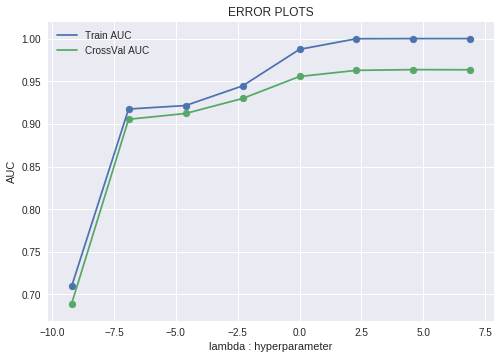

In [0]:
plt.plot(C, Train_AUC_TFIDF, label='Train AUC')
plt.scatter(C, Train_AUC_TFIDF)
plt.plot(C, CrossVal_AUC_TFIDF, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_TFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.01


The optimal value of ' lambda ' obtained is 0.01.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(Train_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_TFIDF)[:,1])

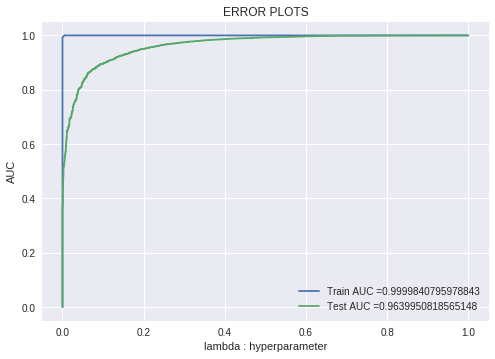

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


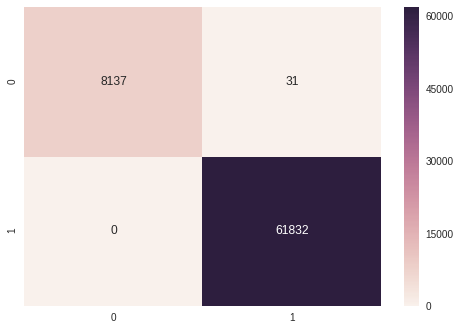

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(Train_TFIDF))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


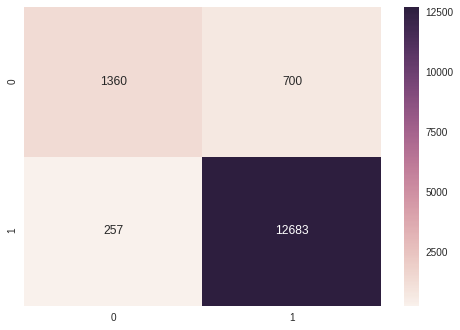

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(Test_TFIDF))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**Most Important Features**

In [0]:
feature_names = tf_idf.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 10 negative class words")
print(prob_sorted[:10])
print("Top 10 positive class words")
print(prob_sorted[:-(11):-1])

Top 10 negative class words
[(-25.282504798619666, 'worst'), (-24.87235815143187, 'disappointed'), (-23.39338124128931, 'not worth'), (-20.9687195551672, 'disappointing'), (-20.602878849312905, 'terrible'), (-19.404751168593478, 'not'), (-19.152946354540408, 'awful'), (-19.104467130039584, 'bland'), (-18.468239689653156, 'disappointment'), (-18.411814150381694, 'not recommend')]
Top 10 positive class words
[(32.46511211967161, 'great'), (26.904357092327096, 'best'), (24.62225813184736, 'delicious'), (21.459222325980978, 'perfect'), (21.22985606719427, 'good'), (20.669750040499732, 'loves'), (20.08383904810631, 'excellent'), (19.95606458476193, 'not disappointed'), (19.54660517047494, 'wonderful'), (17.607244675196753, 'love')]


**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=0.01 on Test Dataset is  14043(93.6%) which is very high.
2. The Area Under Curve value for Test Dataset is 0.96399(approx) which is quite high.
3. The L2 regularisation method takes little less time for computation.

**2.2. L1 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_TFIDF = []
CrossVal_AUC_TFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1')
  logreg.fit(Train_TFIDF, Train_y)
  Train_y_pred =  logreg.predict_proba(Train_TFIDF)[:,1]
  Train_AUC_TFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(CrossVal_TFIDF)[:,1]
  CrossVal_AUC_TFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

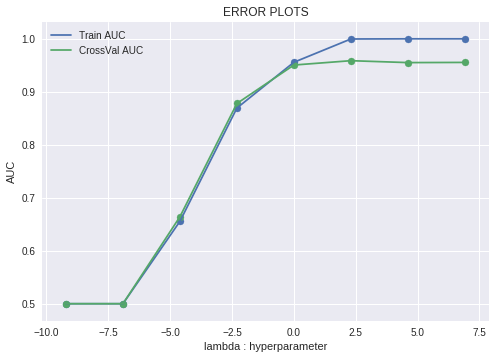

In [0]:
plt.plot(C, Train_AUC_TFIDF, label='Train AUC')
plt.scatter(C, Train_AUC_TFIDF)
plt.plot(C, CrossVal_AUC_TFIDF, label='CrossVal AUC')
plt.scatter(C, CrossVal_AUC_TFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_TFIDF.index(max(CrossVal_AUC_TFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.1


The optimal value of ' lambda ' obtained is 0.1.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1')
Classifier.fit(Train_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(Train_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(Test_TFIDF)[:,1])

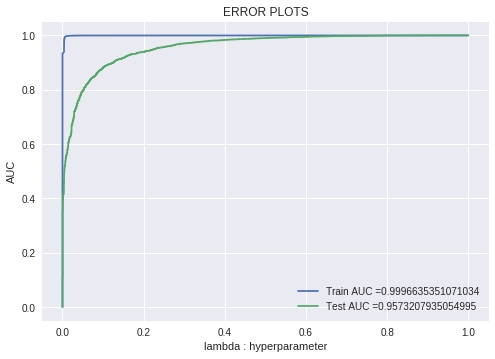

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

**Sparsity of Weight Vector .**

In [0]:
w = Classifier.coef_[0]
print(len(w)-np.count_nonzero(w))

1116760


Number of elements of W* being zero is 1116760.

Confusion Matrix of Train Data


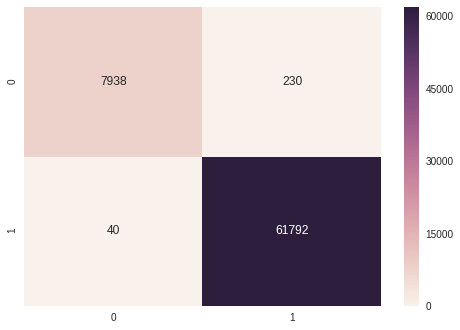

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(Train_TFIDF))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


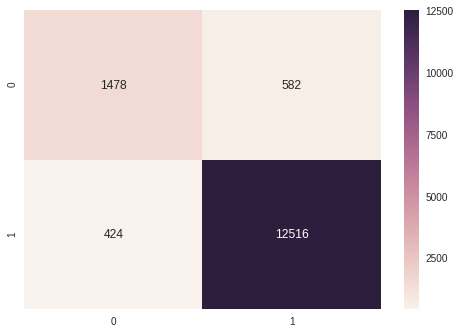

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(Test_TFIDF))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**Most Important Features**

In [0]:
feature_names = tf_idf.get_feature_names()
prob_sorted = sorted(zip(Classifier.coef_[0], feature_names))
print("Top 10 negative class words")
print(prob_sorted[:10])
print("Top 10 positive class words")
print(prob_sorted[:-(11):-1])

Top 10 negative class words
[(-54.18964939955705, 'two stars'), (-41.034888650669544, 'nice guilt'), (-40.900718475514026, 'not worth'), (-39.80414182603491, 'worst'), (-32.96950499613693, 'oats rolled'), (-32.03855627305563, 'disappointing'), (-30.786804984812456, 'not impressed'), (-30.171467118771588, 'disappointed'), (-29.80338133431437, 'easily buy'), (-28.681995473416297, 'per carton')]
Top 10 positive class words
[(42.1448325715511, 'not disappointed'), (39.351210229688796, 'great'), (35.450560423265756, 'delicious'), (33.6816829297455, 'best'), (33.35280420895103, 'pleasantly'), (31.962414062595585, 'perfect'), (29.74423036298357, 'excellent'), (29.570836951775284, 'not overpowering'), (29.293978711985993, 'loves'), (27.461025640162198, 'four stars')]


**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=0.1 on Test Dataset is  13994(93.29%) little less than L2 model.
2. The Area Under Curve value for Test Dataset is 0.95730(approx) which is quite high but little less than L2 model.
3. The L1 regularisation method takes little more time for computation.
4. Number of elements of W* being zero is 1116760 .

**W0RD2VEC**

Converting the words of train data into vectors.

In [0]:
i=0
list_of_sentance_train=[]
for sentance in Train_x:
    list_of_sentance_train.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50,workers=4)
w2v_words = list(w2v_model.wv.vocab)

**3. AVERAGE WORD TO VECTOR.**

**Computing average word2vec for each review of Train Data .**

In [0]:
sent_vectors_train = []; 
for sent in tqdm(list_of_sentance_train): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)

100%|██████████| 70000/70000 [02:34<00:00, 452.34it/s]


**Computing average word2vec for each review of CrossValidate Data .**

In [0]:
i=0
list_of_sentance_cv=[]
for sentance in CrossVal_x:
    list_of_sentance_cv.append(sentance.split())

In [0]:
sent_vectors_cv = []; 
for sent in tqdm(list_of_sentance_cv): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)

100%|██████████| 15000/15000 [00:34<00:00, 435.23it/s]


**Computing average word2vec for each review of Test Data**

In [0]:
i=0
list_of_sentance_test=[]
for sentance in Test_x:
    list_of_sentance_test.append(sentance.split())

In [0]:
sent_vectors_test = []; 
for sent in tqdm(list_of_sentance_test): 
  sent_vec = np.zeros(50) 
  cnt_words =0; 
  for word in sent:
    if word in w2v_words:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
  if cnt_words != 0:
    sent_vec /= cnt_words
  sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)

100%|██████████| 15000/15000 [00:34<00:00, 438.52it/s]


**3.1. L2 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_W2V = []
CrossVal_AUC_W2V = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(sent_vectors_train, Train_y)
  Train_y_pred =  logreg.predict_proba(sent_vectors_train)[:,1]
  Train_AUC_W2V.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(sent_vectors_cv)[:,1]
  CrossVal_AUC_W2V.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

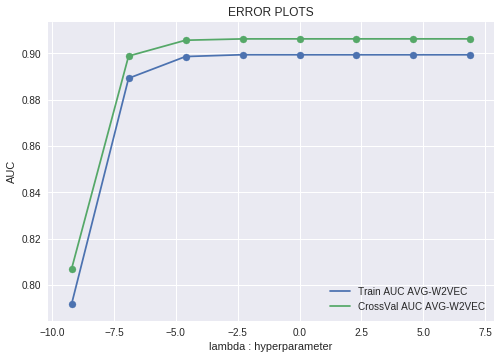

In [0]:
plt.plot(C, Train_AUC_W2V, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_W2V)
plt.plot(C, CrossVal_AUC_W2V, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_W2V)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_W2V.index(max(CrossVal_AUC_W2V))]
print(pow(optimal_inverse_lambda,-1))

0.1


The optimal value of ' lambda ' obtained is 0.1.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(sent_vectors_train, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(sent_vectors_train)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(sent_vectors_test)[:,1])

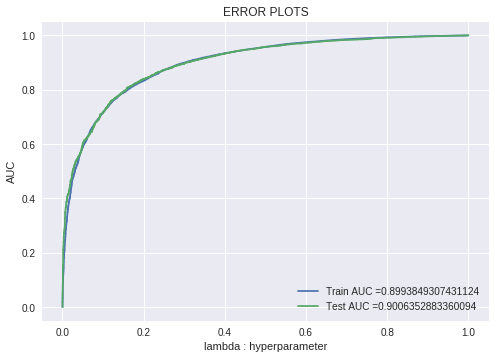

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


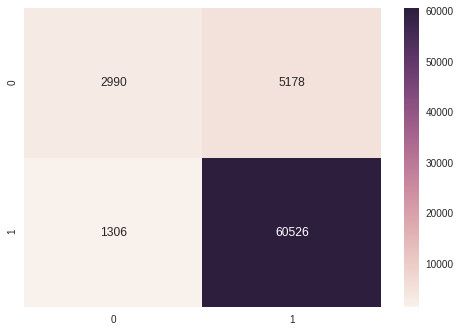

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(sent_vectors_train))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


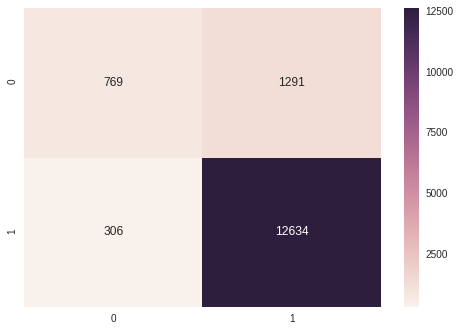

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(sent_vectors_test))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=0.1 on Test Dataset is  13403(89.35%).
2. The Area Under Curve value for Test Dataset is 0.90063(approx).
3. The L2 regularisation method takes little less time for computation.

**3.2. L1 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_W2V = []
CrossVal_AUC_W2V = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1')
  logreg.fit(sent_vectors_train, Train_y)
  Train_y_pred =  logreg.predict_proba(sent_vectors_train)[:,1]
  Train_AUC_W2V.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(sent_vectors_cv)[:,1]
  CrossVal_AUC_W2V.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

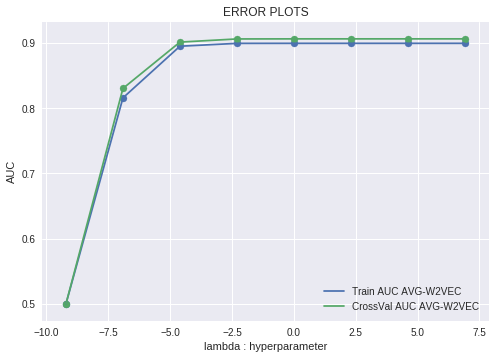

In [0]:
plt.plot(C, Train_AUC_W2V, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_W2V)
plt.plot(C, CrossVal_AUC_W2V, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_W2V)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [0]:
optimal_inverse_lambda=c[CrossVal_AUC_W2V.index(max(CrossVal_AUC_W2V))]
print(pow(optimal_inverse_lambda,-1))

0.1


The optimal value of ' lambda ' obtained is 0.1.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1')
Classifier.fit(sent_vectors_train, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(sent_vectors_train)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(sent_vectors_test)[:,1])

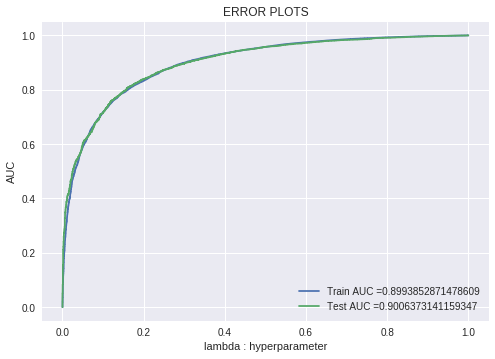

In [0]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


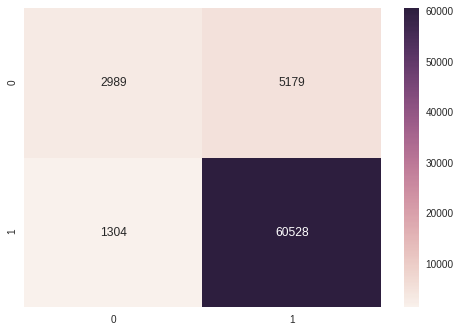

In [0]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(sent_vectors_train))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


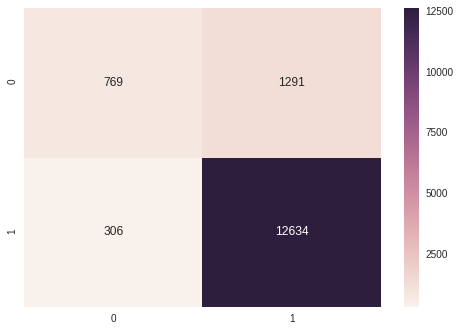

In [0]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(sent_vectors_test))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=0.1 on Test Dataset is  13403(89.35%) same as L2 model.
2. The Area Under Curve value for Test Dataset is 0.90063(approx).
3. The L1 regularisation method takes little more time for computation.

**4. TFIDF AVERAGE W2VEC.**

**Computing tfidf average word2vec for each review of Train dataset.**

In [14]:
tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF = []
row=0;
for sent in tqdm(list_of_sentance_train): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF.append(sent_vec)
    row+=1;

100%|██████████| 70000/70000 [1:13:29<00:00, 15.88it/s]



**Computing tfidf average word2vec for each review of CrossValidate Data .**

In [0]:
i=0
list_of_sentance_cv=[]
for sentance in CrossVal_x:
    list_of_sentance_cv.append(sentance.split())

In [0]:
tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF_cv = []
row=0;
for sent in tqdm(list_of_sentance_cv): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF_cv.append(sent_vec)
    row+=1;

**Computing tfidf average word2vec for each review of Test Data .**

In [0]:
i=0
list_of_sentance_test=[]
for sentance in Test_x:
    list_of_sentance_test.append(sentance.split())

In [12]:
tfidf_feat = tf_idf.get_feature_names()
AVG_TFIDF_test = []
row=0;
for sent in tqdm(list_of_sentance_test): 
    sent_vec = np.zeros(50)  
    weight_sum =0; 
    for word in sent: 
        if((word in w2v_words)&(word in tfidf_feat)):
            vec = w2v_model.wv[word]
            TF_IDF = Train_TFIDF[row , tfidf_feat.index(word)]
            sent_vec += (vec * TF_IDF)
            weight_sum += TF_IDF
    if weight_sum != 0:
        sent_vec /= weight_sum
    AVG_TFIDF_test.append(sent_vec)
    row+=1;

100%|██████████| 15000/15000 [12:55<00:00, 19.35it/s]


**4.1. L2 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_AVGTFIDF = []
CrossVal_AUC_AVGTFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l2')
  logreg.fit(AVG_TFIDF, Train_y)
  Train_y_pred =  logreg.predict_proba(AVG_TFIDF)[:,1]
  Train_AUC_AVGTFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(AVG_TFIDF_cv)[:,1]
  CrossVal_AUC_AVGTFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

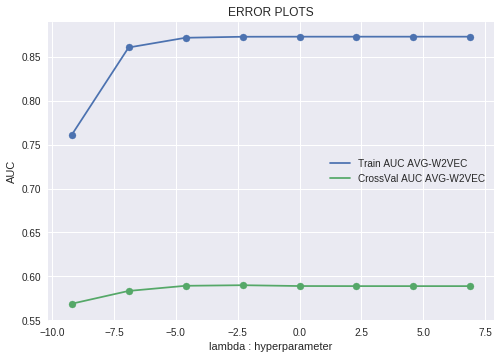

In [13]:
plt.plot(C, Train_AUC_AVGTFIDF, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_AVGTFIDF)
plt.plot(C, CrossVal_AUC_AVGTFIDF, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_AVGTFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [16]:
optimal_inverse_lambda=c[CrossVal_AUC_AVGTFIDF.index(max(CrossVal_AUC_AVGTFIDF))]
print(pow(optimal_inverse_lambda,-1))

10.0


The optimal value of ' lambda ' obtained is 10.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l2')
Classifier.fit(AVG_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(AVG_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(AVG_TFIDF_test)[:,1])

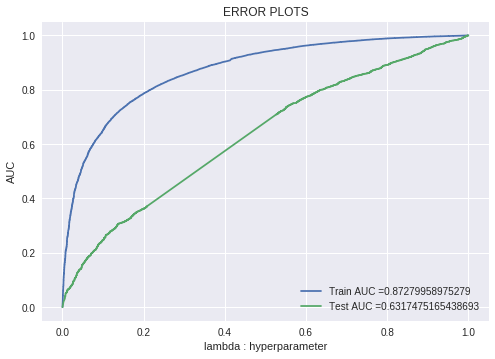

In [18]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


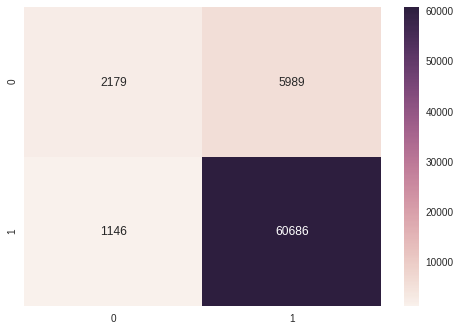

In [19]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(AVG_TFIDF))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


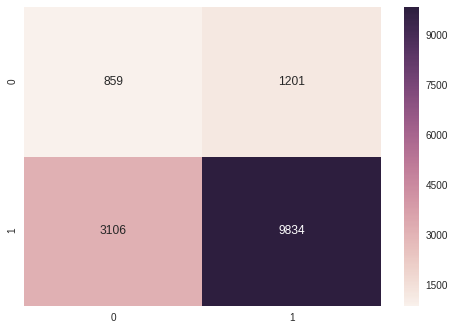

In [20]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(AVG_TFIDF_test))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=10 on Test Dataset is  10693(71.28%) which is quite low.
2. The Area Under Curve value for Test Dataset is 0.63174(approx) which is very low.
3. The L2 regularisation method takes little less time for computation.

**4.2. L1 regularization used.**

**Hyperparameter( lambda ) tuning .**

In [0]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
Train_AUC_AVGTFIDF = []
CrossVal_AUC_AVGTFIDF = []
for i in c:
  logreg = LogisticRegression(C=i,penalty='l1')
  logreg.fit(AVG_TFIDF, Train_y)
  Train_y_pred =  logreg.predict_proba(AVG_TFIDF)[:,1]
  Train_AUC_AVGTFIDF.append(roc_auc_score(Train_y,Train_y_pred))
  CrossVal_y_pred =  logreg.predict_proba(AVG_TFIDF_cv)[:,1]
  CrossVal_AUC_AVGTFIDF.append(roc_auc_score(CrossVal_y,CrossVal_y_pred))

In [0]:
C=[]
for i in range(len(c)):
  C.append(math.log(c[i]))

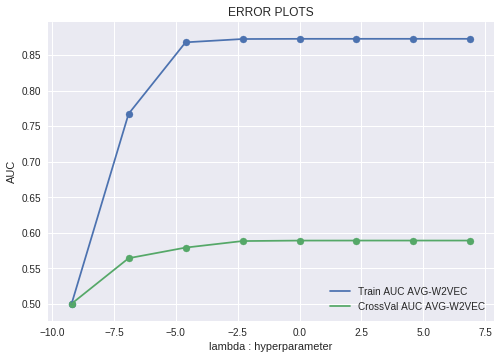

In [23]:
plt.plot(C, Train_AUC_AVGTFIDF, label='Train AUC AVG-W2VEC')
plt.scatter(C, Train_AUC_AVGTFIDF)
plt.plot(C, CrossVal_AUC_AVGTFIDF, label='CrossVal AUC AVG-W2VEC')
plt.scatter(C, CrossVal_AUC_AVGTFIDF)
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [24]:
optimal_inverse_lambda=c[CrossVal_AUC_AVGTFIDF.index(max(CrossVal_AUC_AVGTFIDF))]
print(pow(optimal_inverse_lambda,-1))

0.001


The optimal value of ' lambda ' obtained is 0.001.

In [0]:
Classifier=LogisticRegression(C=optimal_inverse_lambda,penalty='l1')
Classifier.fit(AVG_TFIDF, Train_y)
Train_FPR, Train_TPR, Thresholds = roc_curve(Train_y, Classifier.predict_proba(AVG_TFIDF)[:,1])
Test_FPR, Test_TPR, Thresholds = roc_curve(Test_y, Classifier.predict_proba(AVG_TFIDF_test)[:,1])

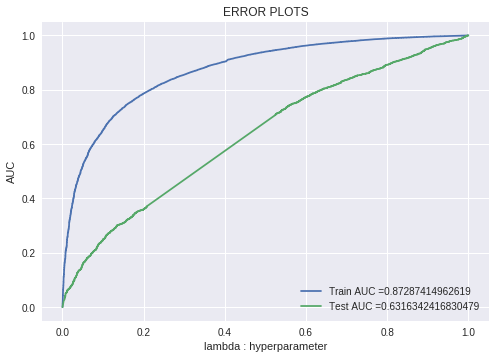

In [26]:
plt.plot(Train_FPR, Train_TPR, label="Train AUC ="+str(auc(Train_FPR, Train_TPR)))
plt.plot(Test_FPR, Test_TPR, label="Test AUC ="+str(auc(Test_FPR, Test_TPR)))
plt.legend()
plt.xlabel("lambda : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Confusion Matrix of Train Data


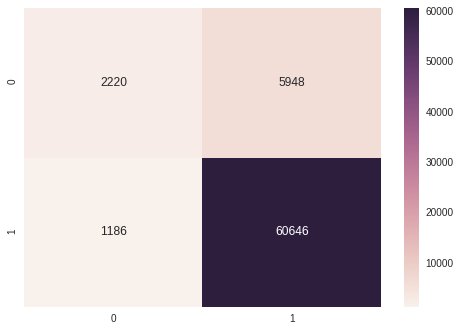

In [27]:
print('Confusion Matrix of Train Data')
Train_mat=confusion_matrix(Train_y,Classifier.predict(AVG_TFIDF))
Train_cm = pd.DataFrame(Train_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Train_cm, annot=True,fmt="d")

Confusion Matrix of Test Data


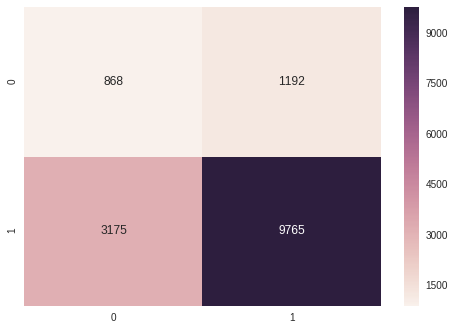

In [28]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(Test_y,Classifier.predict(AVG_TFIDF_test))
Test_cm = pd.DataFrame(Test_mat,index = [i for i in "01"],columns = [i for i in "01"])
sn.heatmap(Test_cm, annot=True,fmt="d")

**OBSERVATION.**
1. The correct prediction ( TP+TN ) of our model with lambda=0.001 on Test Dataset is  10633(70.88%) which is even lower than L2 model.
2. The Area Under Curve value for Test Dataset is 0.63163(approx) which is very lower than L2 model.
3. The L1 regularisation method takes little more time for computation.

**FINAL TABLE**

In [42]:
x = PrettyTable()

x.field_names = ["VECTORIZER", "REGULARIZATION", "HYPER PARAMETER", "AREA UNDER CURVE"]

x.add_row(["BOW","L2",10,0.93848])
x.add_row(["BOW","L1",1,0.93008])
x.add_row(["TFIDF","L2",0.01,0.96399])
x.add_row(["TFIDF","L1",0.1,0.95732])
x.add_row(["AVG-W2VEC","L2",0.1,0.90063])
x.add_row(["AVG-W2VEC","L1",0.1,0.90063])
x.add_row(["TFIDF-AVG W2VEC","L2",10,0.63174])
x.add_row(["TFIDF-AVG W2VEC","L1",0.001,0.63163])
print(x)

+-----------------+----------------+-----------------+------------------+
|    VECTORIZER   | REGULARIZATION | HYPER PARAMETER | AREA UNDER CURVE |
+-----------------+----------------+-----------------+------------------+
|       BOW       |       L2       |        10       |     0.93848      |
|       BOW       |       L1       |        1        |     0.93008      |
|      TFIDF      |       L2       |       0.01      |     0.96399      |
|      TFIDF      |       L1       |       0.1       |     0.95732      |
|    AVG-W2VEC    |       L2       |       0.1       |     0.90063      |
|    AVG-W2VEC    |       L1       |       0.1       |     0.90063      |
| TFIDF-AVG W2VEC |       L2       |        10       |     0.63174      |
| TFIDF-AVG W2VEC |       L1       |      0.001      |     0.63163      |
+-----------------+----------------+-----------------+------------------+


**Summary :**


1.   Our first model is BOW . After hyperparameter( lambda ) tuning , we get the value of lambda ( 10 ( L2 ) , 1 ( L1 ) )  and then we tested our model on test reviews , were we get the AUC value of ( 0.93848 ( L2 ) , 0.93008 ( L1 ) ) . Confusion matrix on train and test dataset is also plotted . Most important features of each class is also found out.

*   We also found the sparcity of weight vector in case of L1 regularization , which is 44995 . 
*   We also performed pertubation test in L2 regularized model and found out that 23 features are collinear .

4.   Our second model is TFIDF .After hyperparameter( lambda ) tuning , we get the value of lambda ( 0.01 ( L2 ) , 0.1 ( L1 ) )  and then we tested our model on test reviews , were we get the AUC value of ( 0.96399 ( L2 ) , 0.95732 ( L1 ) ) . Confusion matrix on train and test dataset is also plotted . Most important features of each class is also found out.
*    We also found the sparcity of weight vector in case of L1 regularization , which is 1116760 .  
3.   Our third model is AVG_BOW . After hyperparameter( lambda ) tuning , we get the value of lambda ( 0.1( L2 ) , 0.1 ( L1 ) )  and then we tested our model on test reviews , were we get the AUC value of ( 0.90063 ( L2 ) , 0.90063 ( L1 ) ) . Confusion matrix on train and test dataset is also plotted . 
4.   Our first model is TFIDF_AVG_BOW . After hyperparameter( lambda ) tuning , we get the value of lambda ( 10 ( L2 ) , 0.001 ( L1 ) )  and then we tested our model on test reviews , were we get the AUC value of ( 0.63174 ( L2 ) , 0.63163 ( L1 ) ) . Confusion matrix on train and test dataset is also plotted . 




**Conclusion**

*   TFIDF vectorizer performs best among all the models with AUC values ( 0.96399 ( L2 ) , 0.95732 ( L1 ) ).
*   TFIDF-AVG W2VEC are the poorest among all the models with lowest AUC values  ( 0.63174 ( L2 ) , 0.63163 ( L1 ) ).
*   Number of elements of W* being zero( sparsity ) is 44995 in case of BOWs and 1116760 in case of TFIDFs.
*   There are 23 features in BOWs model which are collinear . 
*    In general L2 regularization performs better than L1 regularization .



